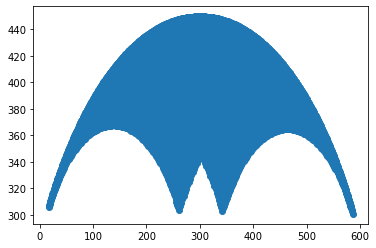

[[586.7032155  300.75175272]
 [584.67620552 303.59351591]
 [582.59990865 306.39947008]
 ...
 [ 21.04530012 311.30008291]
 [ 18.92034883 308.53079247]
 [ 16.84405197 305.7248383 ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import cv2
import pandas as pd


from render import Renderer
# Renderer is a class(package) which helps to plot in cv2
class object(Renderer):
    def __init__(self, recordLocation = None):
        super().__init__(recordLocation=recordLocation)
        self.q1 = 0     # q1 is the angle made by the first limb of manipulator with x axis
        self.q2 = 0     # q2 is the angle made by the second limb of manipulator with x axis
        self.l1 = 150   # length of the first limb
        self.l2 = 200   # length of the second limb
        self.workspace = []
        self.points = []
    def getInfo(self):
        info = { 
            'Workspace':'Blue region as shown is the area traversed by end-effector.'
        }
        return info
    def plot(self):
        data = np.array(self.workspace)
        plt.scatter(data[:,0],data[:,1])
        plt.show()
        return data
        
    def step(self):
        self.q1 = [i for i in range(35,145,1)]
        self.q2 = [i for i in range(35,145,1)]
        
    def draw(self,image):    
        for i in range(len(self.q1)):
            for j in range(len(self.q2)):
                # (x1,y1) is the coordinate of the joint 1
                self.x1 = 300 +self.l1*math.cos(self.q1[i]*math.pi/180)
                self.y1 = 100 +self.l1*math.sin(self.q1[i]*math.pi/180)
        
                # (x2,y2) is the coordinate of the joint 2
                self.x2 = self.x1+self.l2*math.cos(self.q2[j]*math.pi/180)
                self.y2 = self.y1+self.l2*math.sin(self.q2[j]*math.pi/180)
                self.workspace.append((self.x2,self.y2))
                self.points.append((self.x1,self.y1,self.x2,self.y2))
                
        for x1,y1,x2,y2 in self.points:                 
            cv2.line(image,(300,100),(int(self.x1),int(self.y1)),(0,255,0),1) # limb1
            cv2.line(image,(int(self.x1),int(self.y1)),(int(self.x2),int(self.y2)),(0,0,255),1) # limb2
            cv2.circle(image,(int(x2),int(y2)),2,(255,0,0),1)  # trajectory traced by our manipulator

        return image 


anim = object(recordLocation ='anim.mp4')
anim.step()
anim.render(height=600,pause=1)
print(anim.plot())       
        
        